# Task 1

In [ ]:
import pandas as pd
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

from imblearn.over_sampling import SMOTE #сбалансировние данных

In [ ]:
data_house = pd.read_csv("paris_housing_preprocessed.csv")

X_house = data_house.iloc[:, :-1].values
y_house = data_house.iloc[:, 17].values

smote = SMOTE(random_state=100)
X_house, y_house = smote.fit_resample(X_house, y_house)

In [ ]:
model = Sequential()
model.add(Dense(17, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 17)                306       
                                                                 
 dense_19 (Dense)            (None, 1)                 18        
                                                                 
Total params: 324
Trainable params: 324
Non-trainable params: 0
_________________________________________________________________
None


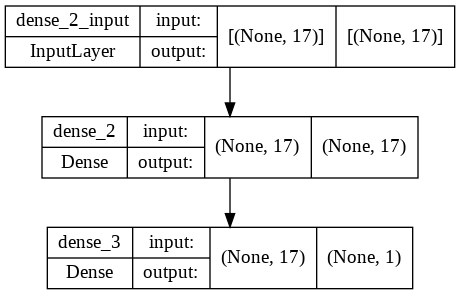

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_house, y_house, epochs=10, batch_size=10)

Epoch 1/10
1747/1747 [==============================] - 7s 3ms/step - loss: 1466.7253 - accuracy: 0.5065
Epoch 2/10
1747/1747 [==============================] - 3s 2ms/step - loss: 1374.0596 - accuracy: 0.5006
Epoch 3/10
1747/1747 [==============================] - 3s 2ms/step - loss: 1346.4213 - accuracy: 0.5069
Epoch 4/10
1747/1747 [==============================] - 3s 2ms/step - loss: 1208.2841 - accuracy: 0.5070
Epoch 5/10
1747/1747 [==============================] - 3s 2ms/step - loss: 1379.9825 - accuracy: 0.5009
Epoch 6/10
1747/1747 [==============================] - 3s 2ms/step - loss: 1289.7921 - accuracy: 0.5029
Epoch 7/10
1747/1747 [==============================] - 3s 2ms/step - loss: 1209.8887 - accuracy: 0.5014
Epoch 8/10
1747/1747 [==============================] - 3s 2ms/step - loss: 1367.7233 - accuracy: 0.5025
Epoch 9/10
1747/1747 [==============================] - 3s 2ms/step - loss: 1306.8557 - accuracy: 0.5082
Epoch 10/10
1747/1747 [==============================] 

In [ ]:
# fit the keras model on the dataset
model.fit(X_house, y_house, epochs=100, batch_size=10)

Epoch 1/100
1747/1747 [==============================] - 4s 2ms/step - loss: 1112.8218 - accuracy: 0.5030
Epoch 2/100
1747/1747 [==============================] - 3s 2ms/step - loss: 1154.5774 - accuracy: 0.5081
Epoch 3/100
1747/1747 [==============================] - 4s 2ms/step - loss: 1226.2516 - accuracy: 0.5089
Epoch 4/100
1747/1747 [==============================] - 3s 2ms/step - loss: 1074.7927 - accuracy: 0.5097
Epoch 5/100
1747/1747 [==============================] - 3s 2ms/step - loss: 1168.2405 - accuracy: 0.5102
Epoch 6/100
1747/1747 [==============================] - 3s 2ms/step - loss: 1153.8575 - accuracy: 0.5094
Epoch 7/100
1747/1747 [==============================] - 3s 2ms/step - loss: 950.9680 - accuracy: 0.5138
Epoch 8/100
1747/1747 [==============================] - 3s 2ms/step - loss: 1056.6299 - accuracy: 0.5063
Epoch 9/100
1747/1747 [==============================] - 3s 2ms/step - loss: 1026.0208 - accuracy: 0.5163
Epoch 10/100
1747/1747 [=======================

In [ ]:
_, accuracy = model.evaluate(X_house, y_house)
print('Accuracy:', accuracy)

546/546 [==============================] - 1s 2ms/step - loss: 276.9980 - accuracy: 0.5230
Accuracy: 0.5229536294937134


In [ ]:
model2 = Sequential()
model2.add(Dense(17, input_dim=17, activation='relu'))
model2.add(Dense(1, activation='softmax'))
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model2.fit(X_house, y_house, epochs=10, batch_size=10)

Epoch 1/10
1747/1747 [==============================] - 6s 3ms/step - loss: 3856.0330 - accuracy: 0.5000
Epoch 2/10
1747/1747 [==============================] - 4s 2ms/step - loss: 2385.3777 - accuracy: 0.5000
Epoch 3/10
1747/1747 [==============================] - 3s 2ms/step - loss: 2510.0291 - accuracy: 0.5000
Epoch 4/10
1747/1747 [==============================] - 3s 1ms/step - loss: 2171.2620 - accuracy: 0.5000
Epoch 5/10
1747/1747 [==============================] - 3s 2ms/step - loss: 2603.5916 - accuracy: 0.5000
Epoch 6/10
1747/1747 [==============================] - 3s 2ms/step - loss: 2673.6465 - accuracy: 0.5000
Epoch 7/10
1747/1747 [==============================] - 3s 2ms/step - loss: 2222.8511 - accuracy: 0.5000
Epoch 8/10
1747/1747 [==============================] - 3s 2ms/step - loss: 2405.9690 - accuracy: 0.5000
Epoch 9/10
1747/1747 [==============================] - 3s 2ms/step - loss: 2132.9597 - accuracy: 0.5000
Epoch 10/10
1747/1747 [==============================] 

In [ ]:
#np.argmax(model.predict(x), axis=-1)
#(model.predict(x) > 0.5).astype("int32")
predictions = (model.predict(X_house) > 0.5).astype("int32")
# summarize the first 5 cases
for i in range(5):
	print(X_house[i].tolist(), '=>', predictions[i], '(expected', y_house[i], ')')

[75523.0, 3.0, 0.0, 1.0, 63.0, 9373.0, 3.0, 8.0, 2005.0, 0.0, 1.0, 4313.0, 9005.0, 956.0, 0.0, 7.0, 7559081.5] => [1] (expected 0 )
[80771.0, 39.0, 1.0, 1.0, 98.0, 39381.0, 8.0, 6.0, 2015.0, 1.0, 0.0, 3653.0, 2436.0, 128.0, 1.0, 2.0, 8085989.5] => [1] (expected 1 )
[55712.0, 58.0, 0.0, 1.0, 19.0, 34457.0, 6.0, 8.0, 2021.0, 0.0, 0.0, 2937.0, 8852.0, 135.0, 1.0, 9.0, 5574642.1] => [1] (expected 0 )
[32316.0, 47.0, 0.0, 0.0, 6.0, 27939.0, 10.0, 4.0, 2012.0, 0.0, 1.0, 659.0, 7141.0, 359.0, 0.0, 3.0, 3232561.2] => [1] (expected 0 )
[70429.0, 19.0, 1.0, 1.0, 90.0, 38045.0, 3.0, 7.0, 1990.0, 1.0, 0.0, 8435.0, 2429.0, 292.0, 1.0, 4.0, 7055052.0] => [1] (expected 1 )


In [ ]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


# Task 2

In [ ]:
import numpy as np

import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

from keras.layers import Dense
from keras.models import Model

import random
import gdown
import os
import PIL
import tqdm

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
input_path = []
label = []
for class_name in os.listdir("images"):
    for path in os.listdir("images/"+class_name):
        if class_name == 'cats':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("images", class_name, path))
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  images/dogs/22.jpg      1
1  images/dogs/24.jpg      1
2  images/cats/24.jpg      0
3  images/cats/18.jpg      0
4  images/dogs/15.jpg      1

In [ ]:
l = list()
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
for i in range(len(l)):
  df = df[df['images'] != l[i]]
len(df)

100

In [ ]:
from keras.preprocessing.image import load_img

def myLoadImg(s):
  plt.figure(figsize=(25, 25))
  begin = random.randint(0, len(df[df['label'] == 1]['images']))
  for index, file in enumerate(df[df['label'] == 1]['images'][begin: begin + 25]):
    plt.subplot(5, 5, index + 1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(s)
    plt.axis('off')

In [ ]:
df['label'] = df['label'].astype('str')
df.head(10)

images label
0  images/dogs/22.jpg     1
1  images/dogs/24.jpg     1
2  images/cats/24.jpg     0
3  images/cats/18.jpg     0
4  images/dogs/15.jpg     1
5  images/dogs/14.jpg     1
6   images/dogs/9.jpg     1
7  images/dogs/29.jpg     1
8  images/dogs/26.jpg     1
9  images/dogs/31.jpg     1

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, random_state=42, test_size=0.3)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

iterator = generator.flow_from_dataframe(
    df_train, 
    x_col='images', 
    y_col='label', 
    target_size=(128, 128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    df_test, 
    x_col='images', 
    y_col='label', 
    target_size=(128, 128), 
    batch_size=512, 
    class_mode='binary'
)

Found 70 validated image filenames belonging to 2 classes.
Found 30 validated image filenames belonging to 2 classes.


In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 512)               2

In [ ]:
model.fit(iterator, epochs=25, batch_size=10)

Epoch 1/25
1/1 [==============================] - 4s 4s/step - loss: 1.8113 - accuracy: 0.5286
Epoch 2/25
1/1 [==============================] - 2s 2s/step - loss: 12.6803 - accuracy: 0.4714
Epoch 3/25
1/1 [==============================] - 2s 2s/step - loss: 7.0899 - accuracy: 0.4714
Epoch 4/25
1/1 [==============================] - 2s 2s/step - loss: 0.7162 - accuracy: 0.6000
Epoch 5/25
1/1 [==============================] - 2s 2s/step - loss: 3.4083 - accuracy: 0.5286
Epoch 6/25
1/1 [==============================] - 2s 2s/step - loss: 3.6209 - accuracy: 0.5286
Epoch 7/25
1/1 [==============================] - 2s 2s/step - loss: 2.6977 - accuracy: 0.5286
Epoch 8/25
1/1 [==============================] - 2s 2s/step - loss: 1.5351 - accuracy: 0.5286
Epoch 9/25
1/1 [==============================] - 2s 2s/step - loss: 0.7629 - accuracy: 0.5286
Epoch 10/25
1/1 [==============================] - 2s 2s/step - loss: 0.7798 - accuracy: 0.4714
Epoch 11/25
1/1 [==============================]

In [ ]:
from keras.applications import vgg16
from keras import layers, models, optimizers

conv_base = vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
 model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
 model.fit(iterator, epochs=25, batch_size=10)

Epoch 1/25
1/1 [==============================] - 13s 13s/step - loss: 1.0196 - accuracy: 0.5143
Epoch 2/25
1/1 [==============================] - 10s 10s/step - loss: 4.8117 - accuracy: 0.4714
Epoch 3/25
1/1 [==============================] - 11s 11s/step - loss: 2.6758 - accuracy: 0.4714
Epoch 4/25
1/1 [==============================] - 11s 11s/step - loss: 0.7738 - accuracy: 0.5286
Epoch 5/25
1/1 [==============================] - 11s 11s/step - loss: 1.0196 - accuracy: 0.5286
Epoch 6/25
1/1 [==============================] - 11s 11s/step - loss: 1.3440 - accuracy: 0.5286
Epoch 7/25
1/1 [==============================] - 11s 11s/step - loss: 1.1727 - accuracy: 0.5286
Epoch 8/25
1/1 [==============================] - 11s 11s/step - loss: 0.7929 - accuracy: 0.5286
Epoch 9/25
1/1 [==============================] - 10s 10s/step - loss: 0.5844 - accuracy: 0.6571
Epoch 10/25
1/1 [==============================] - 10s 10s/step - loss: 0.5840 - accuracy: 0.7143
Epoch 11/25
1/1 [============